In [189]:
import acquire as a
import prepare as p
import model as m

In [190]:
titanic = p.prep_titanic((a.get_titanic_data()))
train,validate,test = p.split(titanic,'survived')
train,validate,test = m.preprocess_titanic(train,validate,test)

this file exists, reading from csv


In [191]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,
776,0,3,29.699118,0,0,7.7500,1,1,1,0
829,1,1,62.000000,0,0,80.0000,1,0,0,1
215,1,1,31.000000,1,0,113.2750,0,0,0,0
258,1,1,35.000000,0,0,512.3292,1,0,0,0
129,0,3,45.000000,0,0,6.9750,1,1,0,1


In [192]:
# 1 baseline prediction: predicting the most prevelant class in the training dataset (the mode)
print(train.survived.mode())
baseline_prediction = 'Not Survived'

0    0
Name: survived, dtype: int64


In [193]:
# baseline accuracy
print(train.survived.value_counts())
baseline_accuracy = 329 / (329+205)
print(baseline_accuracy)

survived
0    329
1    205
Name: count, dtype: int64
0.6161048689138576


In [194]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_val = validate.drop(columns=['survived'])
y_val = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [53]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


# First Model

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 534\nvalue = [329, 205]'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.367\nsamples = 190\nvalue = [46, 144]'),
 Text(0.125, 0.375, 'age <= 3.0\ngini = 0.075\nsamples = 102\nvalue = [4, 98]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.058\nsamples = 101\nvalue = [3, 98]'),
 Text(0.375, 0.375, 'fare <= 23.912\ngini = 0.499\nsamples = 88\nvalue = [42, 46]'),
 Text(0.3125, 0.125, 'gini = 0.488\nsamples = 76\nvalue = [32, 44]'),
 Text(0.4375, 0.125, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.75, 0.625, 'age <= 9.5\ngini = 0.292\nsamples = 344\nvalue = [283, 61]'),
 Text(0.625, 0.375, 'sibsp <= 2.5\ngini = 0.476\nsamples = 23\nvalue = [9, 14]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.6875, 0.125, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.875, 0.375, 'fare <= 26.269\ngini = 0.25\nsamples = 321\nvalue = [274, 47]'),
 Tex

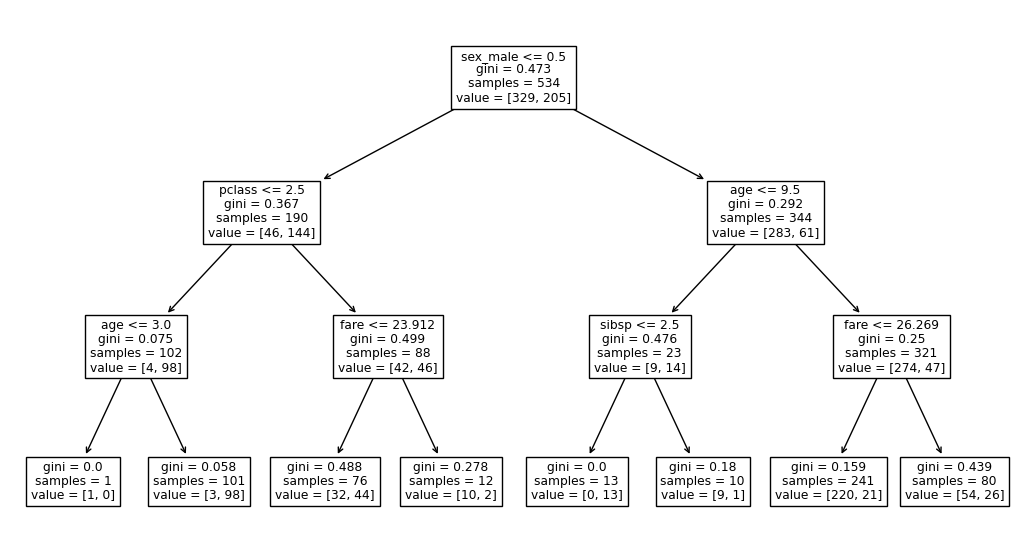

In [120]:
# 2.Fit the decision tree classifier to your training sample and transform 
# (i.e. make predictions on the training sample)

clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# model.fit(X, y)
train1 = clf1.fit(X_train, y_train)

plt.figure(figsize=(13, 7))
plot_tree(clf1, feature_names=X_train.columns.tolist())

In [69]:
# make prediction on train obeservations

ytrain_pred = clf1.predict(X_train)
ytrain_pred[0:5]

array([0, 1, 1, 1, 0])

In [70]:
ytrain_pred_proba = clf1.predict_proba(X_train)
ytrain_pred_proba[0:5]

array([[0.91286307, 0.08713693],
       [0.02970297, 0.97029703],
       [0.02970297, 0.97029703],
       [0.02970297, 0.97029703],
       [0.91286307, 0.08713693]])

In [71]:
# 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.
clf1.score(X_train, y_train)

0.8408239700374532

In [72]:
accuracy_score(y_train,ytrain_pred)

0.8408239700374532

In [73]:
confusion_matrix(y_train, ytrain_pred,normalize='true')

# [True Negative   False Positive]
# [False Negative  True Positive]


array([[0.89361702, 0.10638298],
       [0.24390244, 0.75609756]])

In [50]:
print(classification_report(y_train, ytrain_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       329
           1       0.82      0.76      0.78       205

    accuracy                           0.84       534
   macro avg       0.84      0.82      0.83       534
weighted avg       0.84      0.84      0.84       534



# Model 2

In [111]:
clf2 = DecisionTreeClassifier(max_depth=15, random_state=123)

In [112]:
clf2 = clf2.fit(X_train, y_train)

In [113]:
ytrain_pred2 = clf2.predict(X_train)

In [114]:
clf2.score(X_train, y_train)

0.9850187265917603

In [94]:
print(classification_report(y_train, ytrain_pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       329
           1       0.99      0.97      0.98       205

    accuracy                           0.99       534
   macro avg       0.99      0.98      0.98       534
weighted avg       0.99      0.99      0.98       534



In [ ]:
# clf2 performs better on my in sample data

# Validate

In [121]:
val1 = clf1.fit(X_val, y_val)

In [122]:
clf1.score(X_val, y_val)

0.8314606741573034

In [123]:
val2 = clf2.fit(X_val, y_val)

In [124]:
clf2.score(X_val, y_val)

0.9943820224719101

# Telco Dataset

In [195]:
telco = a.get_telco_data()

this file exists, reading from csv


In [196]:
telco = p.prep_telco(telco)

In [197]:
train,validate,test = p.split(telco,'churn')

In [198]:
train,validate,test = model.preprocess_telco(train,validate,test)

In [199]:
X_train = train.drop(columns=['churn_Yes'])
y_train = train.churn_Yes

X_val = validate.drop(columns=['churn_Yes'])
y_val = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes'])
y_test = test.churn_Yes



# Model 1

In [200]:
clf1 = DecisionTreeClassifier(max_depth=15, random_state=123)

In [201]:
model1 = clf1.fit(X_train, y_train)

In [202]:
model1.score(X_train, y_train)

0.9670538042190092

# Model 2

In [203]:
clf2 = DecisionTreeClassifier(max_depth=50, random_state=123)

In [204]:
model2 = clf2.fit(X_train, y_train)

In [205]:
model2.score(X_train, y_train)

0.9985778620526191

# Validate

In [206]:
val1 = clf1.fit(X_val, y_val)

In [207]:
val1.score(X_val, y_val)

0.9864864864864865

In [208]:
val2 = clf2.fit(X_val, y_val)

In [209]:
val2.score(X_val, y_val)

0.9985775248933144

# Pick model2

In [211]:
test_fit = clf2.fit(X_test,y_test)

In [212]:
test_fit.score(X_test,y_test)

1.0